# Importing necessary Libraries

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import train_test_split as split
import pydataset
import warnings
warnings.filterwarnings('ignore')

**Loading the Data**

In [2]:
df=pydataset.data('Boston')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


**Data Preprocessing**

In [3]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

Zero Null Values present

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


- record of 506 entries


In [5]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Statistical Summary of the data

<AxesSubplot:xlabel='rm', ylabel='medv'>

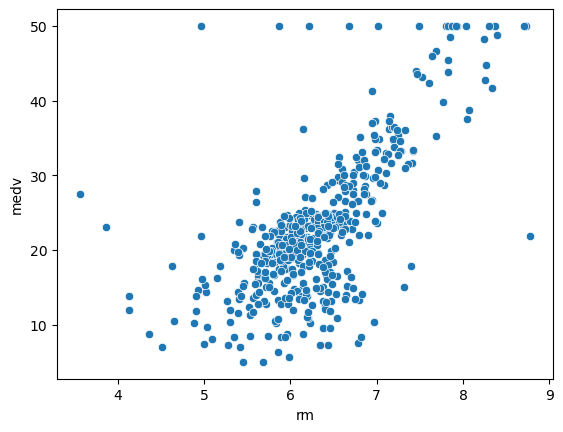

In [6]:
sns.scatterplot(x="rm",y="medv",data=df)

It follows a Linear Pattern

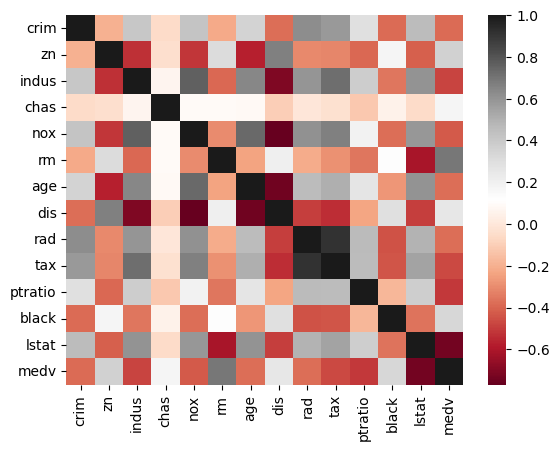

In [7]:
#Checking the Correlation
corr=df.corr()
sns.heatmap(corr,cmap='RdGy')
plt.show()

- When shades of Red/Orange: the more red the color is on X axis, smaller the medv => Negative correlation
- When light colors: those variables at axis x and y, they dont have any relation => Zero correlation
- When shades of Gray/Black : the more black the color is on X axis, more higher the value med => Positive correlation

**Linear Regression**

In [8]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [9]:
#Splitting the data in train and test
x=df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat']]
y=df[['medv']]

In [10]:
x.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [11]:
y.head()

,medv
1,24.0
2,21.6
3,34.7
4,33.4
5,36.2


In [12]:
x_train,x_test,y_train,y_test=split(x,y)

In [13]:
#Fitting X_train and Y_train in our Linear model
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [14]:
#Predicting the x_test
pred=linreg.predict(x_test)

In [15]:
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 3.126022316241064
MSE: 19.02045649498266
RMSE: 4.361244833184977


Considering the RMSE: we can conclude that this model average error is RMSE at medv, which means RMSE *1000 in money

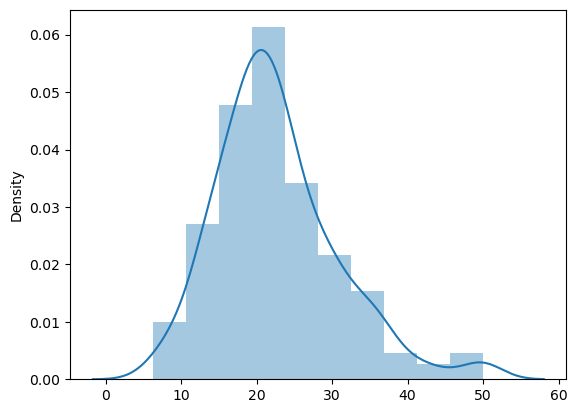

In [16]:
sns.distplot((y_test,pred),bins=10)
plt.show()

In [37]:
linreg.coef_

array([[-9.26963437e-02,  4.43358180e-02,  7.30227148e-03,
         2.33237649e+00, -1.92287758e+01,  3.65487774e+00,
         6.99423450e-03, -1.48052176e+00,  2.66241247e-01,
        -9.55219854e-03, -1.00319025e+00,  7.40889026e-03,
        -5.54288422e-01]])

In [61]:
coefficient=pd.DataFrame(linreg.coef_)
coefficient.columns=x.columns
coefficient.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,-0.092696,0.044336,0.007302,2.332376,-19.228776,3.654878,0.006994,-1.480522,0.266241,-0.009552,-1.00319,0.007409,-0.554288


- for one unit that nox increase, the house value decrease 'nox'*1000 (Negative correlation) money unit.
- for one unit that rm increase, the house value increase 'rm'*1000 (Positive correlation) money unit.